### Import Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv',encoding='latin1')

In [4]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [5]:
df.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [7]:
df.shape

(15433, 11)

In [8]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [9]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [10]:
df['Year'].unique()

array([1976.,   nan, 1980., 1984., 1988., 1992., 1996., 2000., 2004.,
       2008.])

In [11]:
df['City'].unique()

array(['Montreal', nan, 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [14]:
df[df.isnull().any(axis=1)]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#display the sum of null values for each column
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

### Cleanup Data and Remove Null Value

#### The dataset contains, 15,433 rows and 117 of them are null. I have decided to remove them, because there are only 117 rows that are null values

In [19]:
#drop null records and check the shape of my dataframe or the number of rows and columns
df.dropna(inplace=True)
df.shape

(15316, 11)

In [21]:
#tells me the number of games played each year.
athlete_per_year = df.Year.value_counts()
athlete_per_year

Year
2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1387
1976.0    1305
Name: count, dtype: int64

In [104]:
#now we have sorted by years, oldest to most recent 
number_of_athlete_by_year = athlete_per_year.sort_index() 
number_of_athlete_by_year

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: count, dtype: int64

### Medal Distribution by Country:

In [98]:
# Group by Country and count the number of gold medals
country_gold_medals = df[df['Medal'] == 'Gold'].groupby('Country')['Medal'].count().sort_values(ascending=False)
country_gold_medals

Country
United States    928
Soviet Union     439
East Germany     286
Germany          237
China            234
                ... 
Panama             1
Burundi            1
Suriname           1
Colombia           1
Tunisia            1
Name: Medal, Length: 87, dtype: int64

In [100]:

# Get the top 10 countries with the most gold medals
top_countries = country_gold_medals.head(10)
top_countries

Country
United States    928
Soviet Union     439
East Germany     286
Germany          237
China            234
Australia        216
Russia           192
France           154
Cuba             152
Italy            145
Name: Medal, dtype: int64

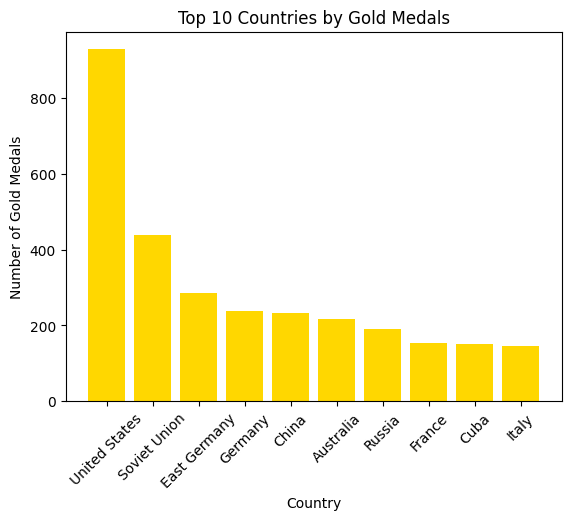

In [103]:
# Create a bar plot
plt.bar(top_countries.index, top_countries.values, color='gold')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('Top 10 Countries by Gold Medals')
plt.xticks(rotation=45)
plt.show()

This code will generate a bar plot displaying the top 10 countries with the most gold medals.

### Gender Participation and Performance:

In [95]:
# Group by Gender and count the number of gold medals
gender_gold_medals = df.groupby('Gender')['Medal'].count()

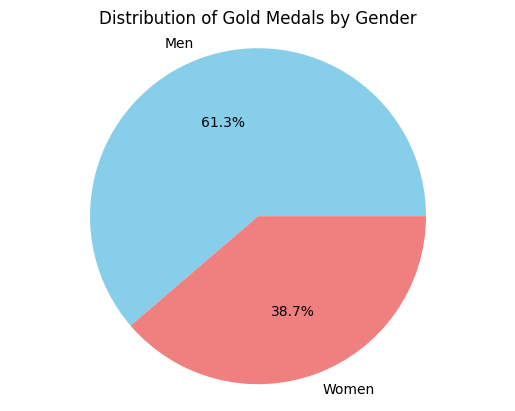

In [96]:
# Create a pie chart
plt.pie(gender_gold_medals, labels=gender_gold_medals.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gold Medals by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This code will generate a pie chart showing the distribution of gold medals between male and female athletes. The percentages on the chart represent the proportion of gold medals won by each gender.

### Popular Sports and Disciplines

In [91]:
# Group by Sport and count the number of gold medals
sport_gold_medals = df.groupby('Sport')['Medal'].count().sort_values(ascending=False)

In [92]:
# Get the top 5 sports with the most gold medals
top_sports = sport_gold_medals.head(5)

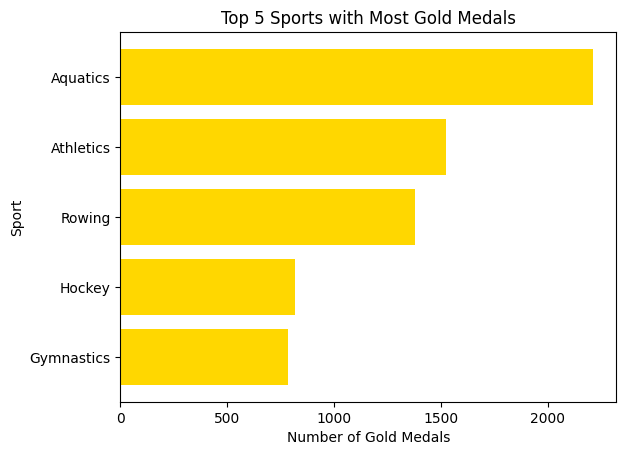

In [93]:
# Create a horizontal bar plot
plt.barh(top_sports.index, top_sports.values, color='gold')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Sport')
plt.title('Top 5 Sports with Most Gold Medals')
plt.gca().invert_yaxis()  # Invert y-axis to have the sport with the most medals at the top
plt.show()

This code will generate a horizontal bar plot displaying the top 5 sports with the most gold medals.

### Domination in Specific Events:

In [88]:
# Group by Athlete and Event to identify duplicate occurrences
athletes_events = df.groupby(['Athlete', 'Event'])['Year'].count().reset_index()

In [89]:
# Filter for athletes who won the same event in multiple Olympics
dominating_athletes = athletes_events[athletes_events['Year'] > 1]

In [90]:
# Display the list of athletes and their dominating events
print('Athletes who have dominated the same event across multiple Olympics:')
print(dominating_athletes[['Athlete', 'Event', 'Year']])

Athletes who have dominated the same event across multiple Olympics:
                    Athlete                                   Event  Year
17      ABBAGNALE, Agostino  quadruple sculls without coxswain (4x)     2
18       ABBAGNALE, Carmine     pair-oared shell with coxswain (2+)     3
19      ABBAGNALE, Giuseppe     pair-oared shell with coxswain (2+)     3
39          ABRAHAM, Attila                  K-4 1000m (kayak four)     2
45          ABSALON, Julien                           cross-country     2
...                     ...                                     ...   ...
12917          ZOU, Shiming                  48kg (light flywieght)     2
12931  ZUKAUSKAS, Eurelijus                              basketball     2
12938       ZVEREVA, Ellina                            discus throw     2
12945       ZWERVER, Ronald                              volleyball     2
12951        ZYKINA, Olesya                            4x400m relay     2

[1987 rows x 3 columns]


This code snippet print out a list of athletes who have won the same event in multiple Olympics, along with the event name and the number of times they achieved this feat.

### Country Performance Oer Time

In [77]:

# Count the number of gold medals won by each athlete
athlete_medal_counts = df['Athlete'].value_counts()
print(athlete_medal_counts)

Athlete
PHELPS, Michael                  16
TORRES, Dara                     12
THOMPSON, Jenny                  12
FISCHER, Birgit                  12
ANDRIANOV, Nikolay               12
                                 ..
KIRKWOOD, James William           1
LEJEUNE, Elisabeth Anne Marie     1
WOLFF, Ingrid Imelda              1
MEILING, Marc                     1
LOPEZ, Mijain                     1
Name: count, Length: 11337, dtype: int64


In [79]:
# Get the top athletes with the most gold medals
top_athletes = athlete_medal_counts.head(10)
print(top_athletes)

Athlete
PHELPS, Michael           16
TORRES, Dara              12
THOMPSON, Jenny           12
FISCHER, Birgit           12
ANDRIANOV, Nikolay        12
NEMOV, Alexei             12
COUGHLIN, Natalie         11
BIONDI, Matthew           11
VAN ALMSICK, Franziska    10
LEWIS, Carl               10
Name: count, dtype: int64


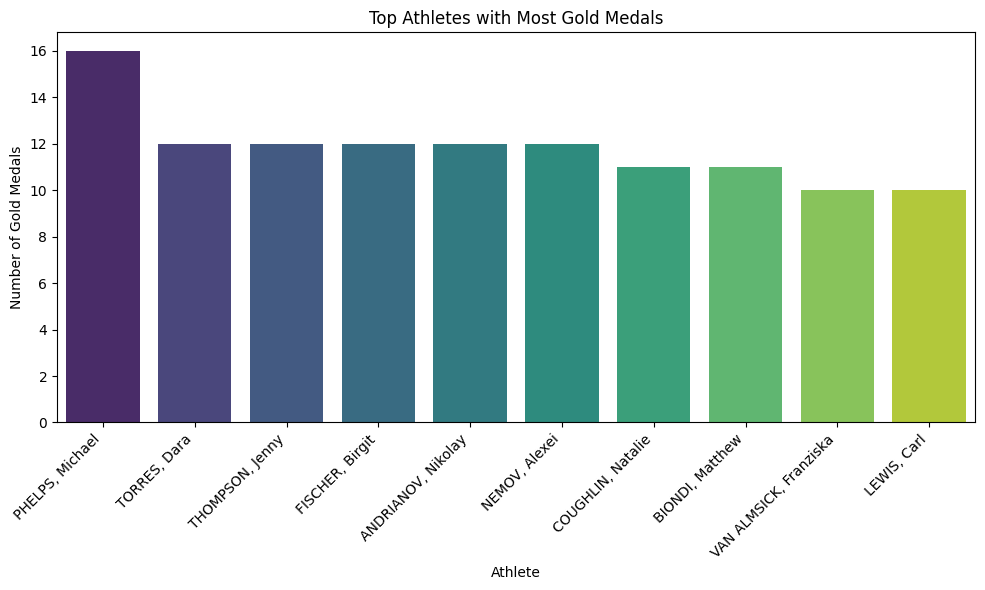

In [82]:

# Plot the distribution of gold medals among athletes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_athletes.index, y=top_athletes.values, palette='viridis')
plt.title('Top Athletes with Most Gold Medals')
plt.xlabel('Athlete')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count the number of gold medals won by each athlete, select the top athletes with the most gold medals, and then create a bar plot to visualize the distribution of gold medals among these top athletes. Adjust the number of top athletes and the visualization settings according to your preferences.